0.2625


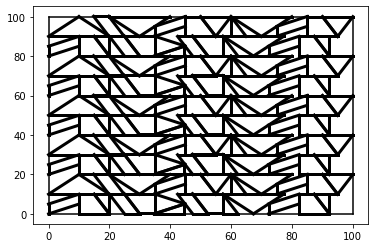

In [3]:
from __future__ import division
import numpy as np
from shapely.geometry import Point, LineString, Polygon, MultiPoint
import matplotlib.pyplot as plt


def exchange_seq(polygons,line):
    polys = []
    for i in line:
        polys.append(polygons[i])
    return polys


def mod_ac(p):
    polygon = []
    for i in range(len(p)):
        x = float('{:15f}'.format(p[i][0]))
        y = float('{:15f}'.format(p[i][1]))
        polygon.append([x, y])
    return polygon


def get_points(polygon1, polygon2):
    points = []
    for i in range(len(polygon1)):
        points.append(polygon1[i])
    for j in range(len(polygon2)):
        points.append(polygon2[j])
    return points


def vector(p1, p2):
    v = [p1[0] - p2[0], p1[1] - p2[1]]
    return v


def rotate(angle, polygon):
    p1 = []
    for p in polygon:
        x1 = p[0] * np.cos(angle) + p[1] * np.sin(angle)
        y1 = p[1] * np.cos(angle) - p[0] * np.sin(angle)
        # x1 = round(x1, 0)
        # y1 = round(y1, 0)
        p1.append([x1, y1])
    # print("旋转角度：", int(360 * 0.5 * angle / math.pi), "度")
    return p1


def plt_polygon(polygon, c='k', lw=3):
    for i in range(len(polygon) - 1):
        plt.plot([polygon[i][0], polygon[i + 1][0]], [polygon[i][1], polygon[i + 1][1]], color=c, linewidth=lw)
    plt.plot([polygon[-1][0], polygon[0][0]], [polygon[-1][1], polygon[0][1]], color=c, linewidth=lw)


def list_multiple(list1, x):
    l1 = []
    for a in list1:
        b = a * x
        l1.append(b)
    return l1


def polygon_area(points):
    """返回多边形面积"""
    area = 0
    q = points[-1]
    for p in points:
        area += p[0] * q[1] - p[1] * q[0]
        q = p
    return area / 2


def polygon_translate(polygon, v):
    polygon_star = []
    for i in range(len(polygon)):
        p1 = polygon[i][0] + v[0]
        p2 = polygon[i][1] + v[1]
        polygon_star.append([p1, p2])
    return polygon_star


def clockwise_angle(v2, v1):
    x1, y1 = v1
    x2, y2 = v2
    dot = x1*x2+y1*y2
    det = x1*y2-y1*x2
    theta = np.arctan2(det, dot)
    if theta > 0:
        return theta
    else:
        return 2*np.pi + theta


def vector_set(polygon1, polygon2):
    vectorset = []
    for i in range(len(polygon1)):
        if i < len(polygon1) - 1:
            vectorset.append(vector(polygon1[i], polygon1[i + 1]))
        else:
            vectorset.append(vector(polygon1[-1], polygon1[0]))
    for i in range(len(polygon2)):
        if i < len(polygon2) - 1:
            vectorset.append(vector(polygon2[i + 1], polygon2[i]))
        else:
            vectorset.append(vector(polygon2[0], polygon2[-1]))
    return vectorset


def get_seq(vs):
    s1 = [vs[0]]
    del vs[0]
    while len(vs) != 1:
        min_angle = clockwise_angle(s1[-1], vs[0])
        index = 0
        for j in range(1, len(vs)):
            if min_angle < clockwise_angle(s1[-1], vs[j]) or clockwise_angle(s1[-1], vs[j]) < 3e-6 or clockwise_angle(vs[j], s1[-1]) < 3e-6:
                index = j
                min_angle = clockwise_angle(s1[-1], vs[j])
        s1.append(vs[index])
        del vs[index]
    s1.append(vs[0])
    return s1


def get_nfp(s):
    s1 = []
    s2 = []
    nfp = []
    for i in range(len(s)):
        s1.append(s[i][0])
        s2.append(s[i][1])
        x = sum(s1[:i + 1])
        y = sum(s2[:i + 1])
        nfp.append([x, y])
    return nfp


def make_nfp(p1, p2):
    vs = vector_set(p1, p2)
    seq = get_seq(vs)
    nfp = get_nfp(seq)
    nfp = polygon_translate(nfp, [-seq[0][0], -seq[0][1]])
    return nfp



"开始排样"


def initial(polygons):
    # 将所有多边形移到原点处,顶点按顺时针排序
    for i in range(len(polygons)):
        if polygons[i][0] != [0, 0]:
            p0 = polygon_translate(polygons[i], [-polygons[i][0][0], -polygons[i][0][1]])
            polygons[i] = p0
        if polygon_area(polygons[i]) < 0:
            for j in range(1, int((len(polygons[i])+1)/2)):
                t = polygons[i][-j]
                polygons[i][-j] = polygons[i][j]
                polygons[i][j] = t
    return polygons


def top_right_point(polygon):
    p = polygon[0]
    for i in range(1, len(polygon)):
        if polygon[i][1] >= p[1]:
            if polygon[i][1] > p[1]:
                p = polygon[i]
            elif polygon[i][1] == p[1] and polygon[i][0] > p[0]:
                p = polygon[i]
    return p


def left_top_point(polygon):
    p = polygon[0]
    for i in range(1, len(polygon)):
        if polygon[i][0] <= p[0]:
            if polygon[i][0] < p[0]:
                p = polygon[i]
            elif polygon[i][0] == p[0] and polygon[i][1] > p[1]:
                p = polygon[i]
    return p


def bottom_left_point(polygon):
    p = polygon[0]
    for i in range(1, len(polygon)):
        if polygon[i][1] <= p[1]:
            if polygon[i][1] < p[1]:
                p = polygon[i]
            elif polygon[i][1] == p[1] and polygon[i][0] < p[0]:
                p = polygon[i]
    return p


def right_bottom_point(polygon):
    p = polygon[0]
    for i in range(1, len(polygon)):
        if polygon[i][0] >= p[0]:
            if polygon[i][0] > p[0]:
                p = polygon[i]
            elif polygon[i][0] == p[0] and polygon[i][1] < p[1]:
                p = polygon[i]
    return p


def get_ref(polygon1, nfp, polygon2):
    num = [0]*len(polygon2)
    nfp1 = nfp
    nfp1.append(nfp[0])
    nfp1 = mod_ac(nfp1)
    p1tr = top_right_point(polygon1)
    p1rb = right_bottom_point(polygon1)
    p1bl = bottom_left_point(polygon1)
    p1lt = left_top_point(polygon1)
    p2tr = top_right_point(polygon2)
    p2rb = right_bottom_point(polygon2)
    p2bl = bottom_left_point(polygon2)
    p2lt = left_top_point(polygon2)
    polygon2tr = polygon_translate(polygon2, vector(p1tr, p2bl))
    polygon2tr = mod_ac(polygon2tr)
    polygon2bl = polygon_translate(polygon2, vector(p1bl, p2tr))
    polygon2bl = mod_ac(polygon2bl)
    polygon2lt = polygon_translate(polygon2, vector(p1lt, p2rb))
    polygon2lt = mod_ac(polygon2lt)
    polygon2rb = polygon_translate(polygon2, vector(p1rb, p2lt))
    polygon2rb = mod_ac(polygon2rb)
    for i in range(len(polygon2tr)):
        if LineString(nfp1).contains(Point(polygon2tr[i])):
            num[i] += 1
        if LineString(nfp1).contains(Point(polygon2lt[i])):
            num[i] += 1
        if LineString(nfp1).contains(Point(polygon2bl[i])):
            num[i] += 1
        if LineString(nfp1).contains(Point(polygon2rb[i])):
            num[i] += 1
    return polygon2[num.index(max(num))]


def feasible_place(nfp, polygon, refer_point, d, box):
    poly = []
    line = []
    p = Polygon(box)
    nfp.append(nfp[0])
    q = LineString(nfp)
    x = p.intersection(q)
    if x.type != "LineString":
        if x.type != "Point":
            for i in range(len(list(x.geoms))):
                if x.geoms[i].type == "LineString":
                    line.append(x.geoms[i])
        else:
            return poly
    else:
        line.append(x)
    for i in range(len(line)):
        distance = 0
        ip = line[i].interpolate(distance)
        ip1 = ip.coords[0][0]
        ip2 = ip.coords[0][1]
        pt = Polygon(polygon_translate(polygon, vector([ip1, ip2], refer_point)))
        while p.contains(pt) is False:
            if line[i].interpolate(distance) == line[i].interpolate(distance-d):
                break
            distance += d
            ip = line[i].interpolate(distance)
            ip1 = ip.coords[0][0]
            ip2 = ip.coords[0][1]
            pt = Polygon(polygon_translate(polygon, vector([ip1, ip2], refer_point)))
        if line[i].interpolate(distance) == line[i].interpolate(distance-d):
            continue
        poly.append(polygon_translate(polygon, vector([ip1, ip2], refer_point)))
        while p.contains(pt) and line[i].interpolate(distance) != line[i].interpolate(distance-d):
            distance += d
            ip = line[i].interpolate(distance)
            ip1 = ip.coords[0][0]
            ip2 = ip.coords[0][1]
            pt = Polygon(polygon_translate(polygon, vector([ip1, ip2], refer_point)))
            poly.append(polygon_translate(polygon, vector([ip1, ip2], refer_point)))
        if p.contains(Polygon(poly[-1])) is False:
            del poly[-1]
    return poly


def best_place(polygon, pa):
    polygon_star = pa[0]
    for i in range(1, len(pa)):
        # ps1 = get_points(polygon_star, polygon)
        # cc1 = MultiPoint(ps1).convex_hull
        # ps2 = get_points(polygon, pa[i])
        # cc2 = MultiPoint(ps2).convex_hull
        # if cc1.area > cc2.area:
        #     polygon_star = pa[i]
        if pa[i][0][1] < polygon_star[0][1]:
            polygon_star = pa[i]
    return polygon_star


def packing1(polygons, box):
    d = 0.3
    poly = [polygons[0]]
    pb = [0, 0, 0, 0]
    cc = [0, 0, 0, 0]
    cc_star = [polygons[0]]
    for i in range(1, len(polygons)):
        non_fit_polygon0 = make_nfp(cc_star[-1], polygons[i])
        refer_point0 = get_ref(cc_star[-1], non_fit_polygon0, polygons[i])
        pa0 = feasible_place(non_fit_polygon0, polygons[i], refer_point0, d, box)
        if len(pa0) != 0:
            pb[0] = best_place(cc_star[-1], pa0)
            ps = get_points(cc_star[-1], pb[0])
            ch = MultiPoint(ps).convex_hull
            cc[0] = list(ch.exterior.coords)[:-1]
        else:
            pb[1] = [[0, 0], [0, 0], [0, 0]]
            cc[0] = box

        polygon90 = rotate(np.pi/2, polygons[i])
        non_fit_polygon1 = make_nfp(cc_star[-1], polygon90)
        refer_point1 = get_ref(cc_star[-1],non_fit_polygon1, polygon90)
        pa1 = feasible_place(non_fit_polygon1, polygon90, refer_point1, d, box)
        if len(pa1) != 0:
            pb[1] = best_place(cc_star[-1], pa1)
            ps = get_points(cc_star[-1], pb[1])
            ch = MultiPoint(ps).convex_hull
            cc[1] = list(ch.exterior.coords)[:-1]
        else:
            pb[1] = [[0, 0], [0, 0], [0, 0]]
            cc[1] = box

        polygon180 = rotate(np.pi, polygons[i])
        non_fit_polygon2 = make_nfp(cc_star[-1], polygon180)
        refer_point2 = get_ref(cc_star[-1],non_fit_polygon2, polygon180)
        pa2 = feasible_place(non_fit_polygon2, polygon180, refer_point2, d, box)
        if len(pa2) != 0:
            pb[2] = best_place(cc_star[-1], pa2)
            ps = get_points(cc_star[-1], pb[2])
            ch = MultiPoint(ps).convex_hull
            cc[2] = list(ch.exterior.coords)[:-1]
        else:
            pb[2] = [[0, 0], [0, 0], [0, 0]]
            cc[2] = box

        polygon270 = rotate(3*np.pi/2, polygons[i])
        non_fit_polygon3 = make_nfp(cc_star[-1], polygon270)
        refer_point3 = get_ref(cc_star[-1],non_fit_polygon3, polygon270)
        pa3 = feasible_place(non_fit_polygon3, polygon270, refer_point3, d, box)
        if len(pa3) != 0:
            pb[3] = best_place(cc_star[-1], pa3)
            ps = get_points(cc_star[-1], pb[3])
            ch = MultiPoint(ps).convex_hull
            cc[3] = list(ch.exterior.coords)[:-1]
        else:
            pb[3] = [[0, 0], [0, 0], [0, 0]]
            cc[3] = box

        c = cc[0]
        index = 0
        for j in range(1, 4):
            if Polygon(cc[j]).area < Polygon(c).area:
                c = cc[j]
                index = j
        if c != box:
            if Polygon(pb[index]).intersection(Polygon(cc_star[-1])).area == 0:
                poly.append(pb[index])
                cc_star.append(c)
        else:
            break
    return poly


def packing(polygons, box):
    set = []
    while polygons!=[]:
        b = packing1(polygons,box)
        set.append(b)
        del polygons[:len(b)]
    return set[:10]


def plt_set(set):
    for i in range(len(set)):
        for p in set[i]:
            p = polygon_translate(p, [0,10*i])
            plt_polygon(p)


if __name__ == "__main__":
    stringBox = [(0, 0), (0, 11), (101, 11), (101, 0)]
    polygon1 = [[0, 0], [0, 5], [10, 10], [10, 5]]
    polygon2 = [[0, 0], [0, 5], [10, 10], [10, 0]]
    polygon3 = [[0, 0], [5, 10], [10, 0]]
    polygon4 = [[0, 0], [10, 5], [10, 0]]
    polygon5 = [[0, 0], [10, 10], [20, 0]]
    polygons = [polygon1, polygon2, polygon3, polygon4, polygon5]*30
    s = packing(polygons, stringBox)
    a = 0
    for i in range(len(s)):
        for p in s[i]:
            a += Polygon(p).area
    r = (10000-a)/10000
    plt_set(s)
    print(r)
    plt.plot([0, 100], [0, 0], color='k')
    plt.plot([0, 0], [0, 100], color='k')
    plt.plot([0, 100], [100, 100], color='k')
    plt.plot([100, 100], [100, 0], color='k')
    plt.show()
